# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 610


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
print(cities)

['ponta delgada', 'vilyuchinsk', 'barguzin', 'lihue', 'yaren', 'cooma', 'hermanus', 'blackmans bay', 'port augusta', 'edinburgh of the seven seas', 'montevideo', 'ust-nera', 'island harbour', 'bredasdorp', 'codrington', 'bocaiuva', 'grytviken', 'nha trang', 'west island', 'port-aux-francais', 'georgetown', 'utrik', 'callao', 'hawaiian paradise park', 'afaahiti', 'waitangi', 'nova sintra', 'morehead city', 'devinuwara', 'taiohae', 'puerto natales', 'sisimiut', 'scarborough', 'albany', 'progreso', 'inhambane', 'myitkyina', 'prokhladnyy', 'samtse', 'anchorage', 'namibe', 'novyy urengoy', 'hadibu', 'yanam', 'udachny', 'adamstown', 'ushuaia', 'bangjun', 'tura', 'resplendor', 'mukalla', "la'ie", 'talnakh', 'tumut', 'constantia', 'kembe', 'okha', 'muravlenko', 'kupang', 'vorgashor', 'cambria', 'hasaki', "bu'aale", 'canutama', 'soe', 'kloulklubed', 'bethel', 'susuman', 'baise city', 'ballina', 'iskateley', 'mahina', 'vranje', 'port alfred', 'thompson', 'qalat', 'college', 'goondiwindi', 'puert

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
            # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()
        

        # # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]
        city_max_temp = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["clouds"]["all"]
        city_wind = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
             
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ponta delgada
Processing Record 2 of Set 1 | vilyuchinsk
Processing Record 3 of Set 1 | barguzin
Processing Record 4 of Set 1 | lihue
Processing Record 5 of Set 1 | yaren
Processing Record 6 of Set 1 | cooma
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | blackmans bay
Processing Record 9 of Set 1 | port augusta
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | montevideo
Processing Record 12 of Set 1 | ust-nera
Processing Record 13 of Set 1 | island harbour
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | codrington
Processing Record 16 of Set 1 | bocaiuva
Processing Record 17 of Set 1 | grytviken
Processing Record 18 of Set 1 | nha trang
Processing Record 19 of Set 1 | west island
Processing Record 20 of Set 1 | port-aux-francais
Processing Record 21 of Set 1 | georgetown
Processing Record 22 of Set 1 | u

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ponta delgada,37.7333,-25.6667,290.55,88,75,10.80,PT,1707347459
1,vilyuchinsk,52.9306,158.4028,261.30,86,100,1.83,RU,1707347459
2,barguzin,53.6167,109.6167,258.38,95,100,1.02,RU,1707347459
3,lihue,21.9789,-159.3672,299.73,67,75,7.72,US,1707347308
4,yaren,-0.5472,166.9160,302.41,77,83,7.37,NR,1707347460


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ponta delgada,37.7333,-25.6667,290.55,88,75,10.80,PT,1707347459
1,vilyuchinsk,52.9306,158.4028,261.30,86,100,1.83,RU,1707347459
2,barguzin,53.6167,109.6167,258.38,95,100,1.02,RU,1707347459
3,lihue,21.9789,-159.3672,299.73,67,75,7.72,US,1707347308
4,yaren,-0.5472,166.9160,302.41,77,83,7.37,NR,1707347460


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

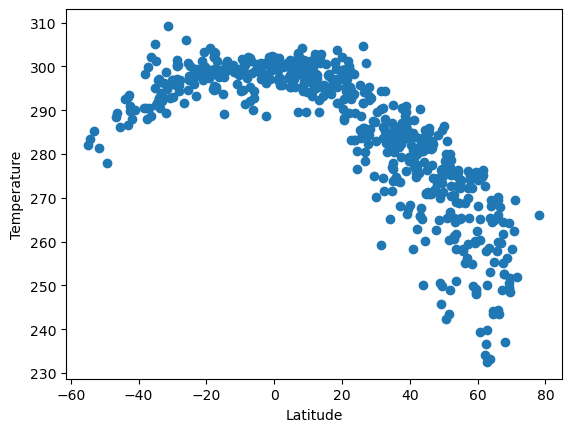

In [9]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Temperature')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

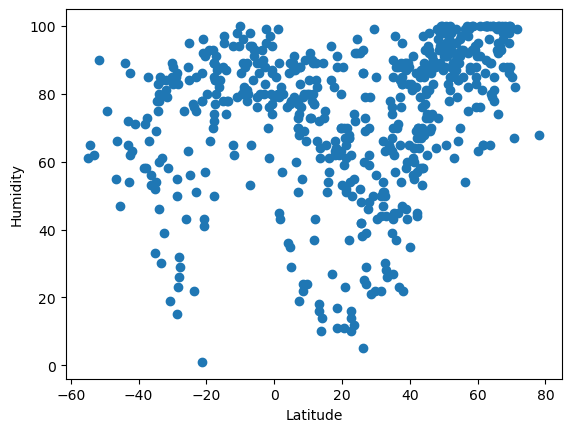

In [10]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

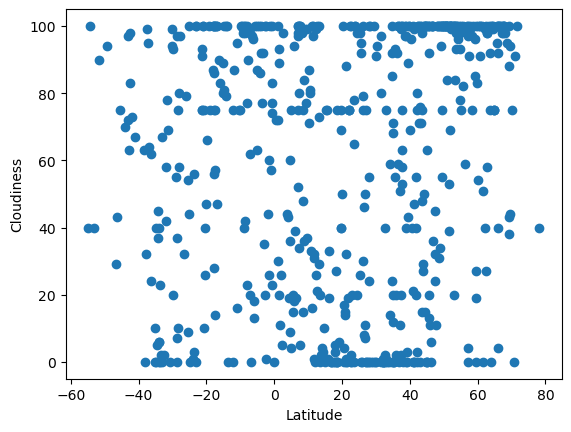

In [11]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

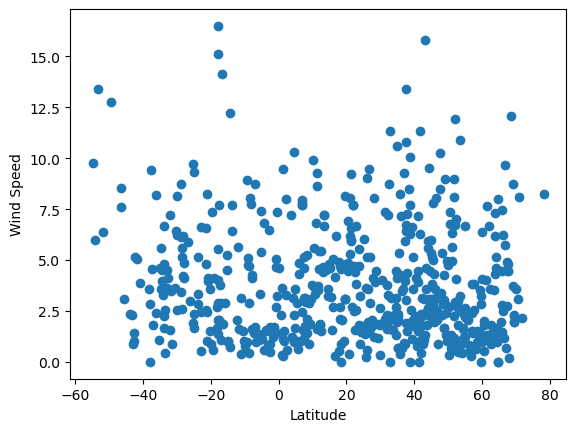

In [12]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)


In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] >=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ponta delgada,37.7333,-25.6667,290.55,88,75,10.80,PT,1707347459
1,vilyuchinsk,52.9306,158.4028,261.30,86,100,1.83,RU,1707347459
2,barguzin,53.6167,109.6167,258.38,95,100,1.02,RU,1707347459
3,lihue,21.9789,-159.3672,299.73,67,75,7.72,US,1707347308
11,ust-nera,64.5667,143.2000,243.44,100,100,0.98,RU,1707347460


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,yaren,-0.5472,166.9160,302.41,77,83,7.37,NR,1707347460
5,cooma,-36.2333,149.1333,288.61,56,24,2.39,AU,1707347460
6,hermanus,-34.4187,19.2345,291.93,83,45,4.51,ZA,1707347460
7,blackmans bay,-43.0167,147.3167,292.89,65,72,0.89,AU,1707347460
8,port augusta,-32.5000,137.7667,296.29,39,2,4.11,AU,1707347460


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.856847368675187


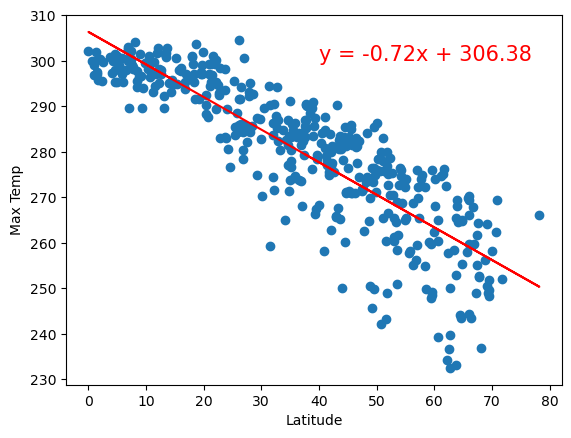

In [27]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.scatter(x_values,y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,300),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.5849417472472866


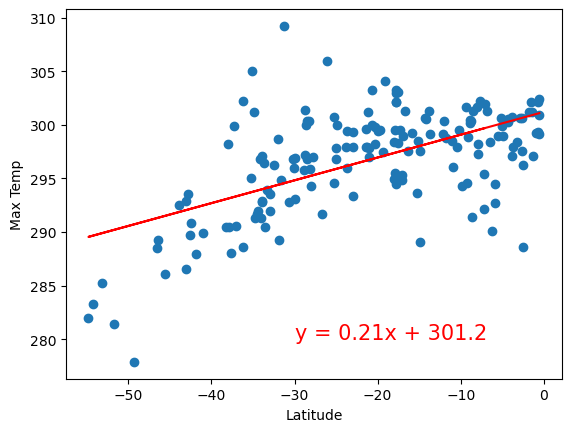

In [28]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.scatter(x_values,y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,280),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** There is a strong correlation in the northern hemisphere between getting closer to the equator (0) and the temperature getting warmer.  There is also a correlation in the southern hemisphere, but not as strong.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4380799051659423


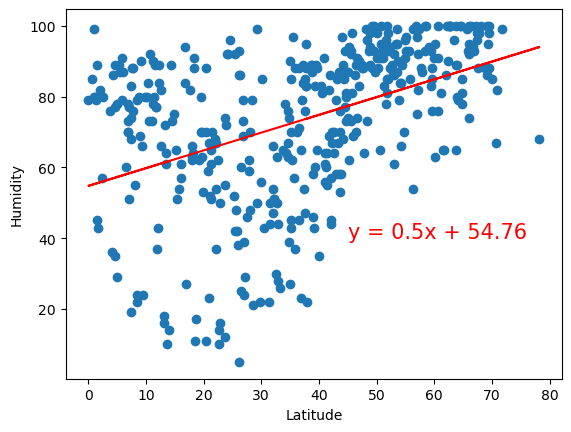

In [33]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.scatter(x_values,y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.4064839443562939


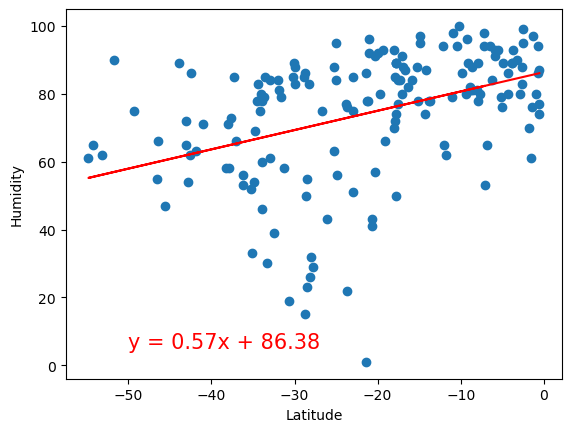

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.scatter(x_values,y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,5),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** There is a similar correlation in both the nothern and southern hemispheres on the humidity rising as you approach the equator.  The R values are similar for both.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.32762140755917984


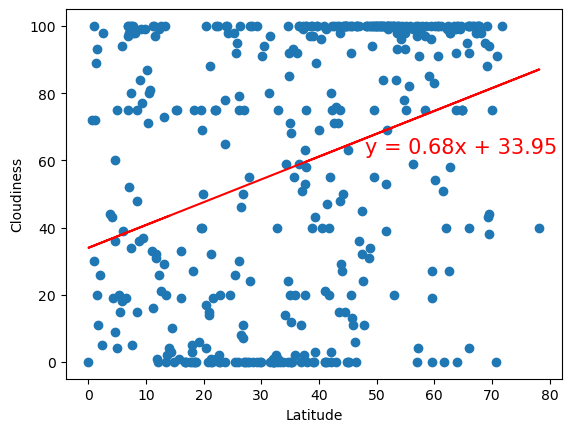

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.scatter(x_values,y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(48,62),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.2148274560552146


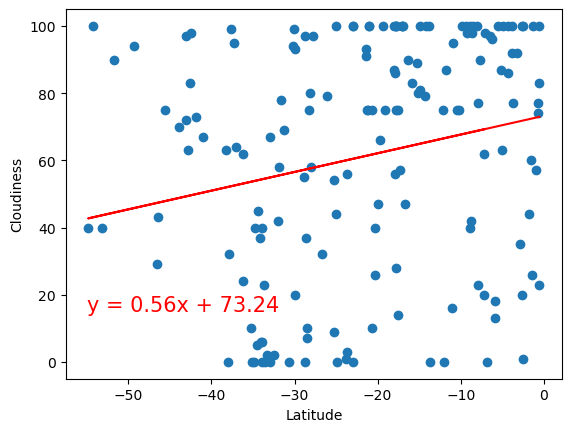

In [47]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.scatter(x_values,y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** There is little correlation between the northern and southern hemispheres in regards to cloudiness.  This is to be expected as weather patters will fluctate around the globe at any given time.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.04798639472770814


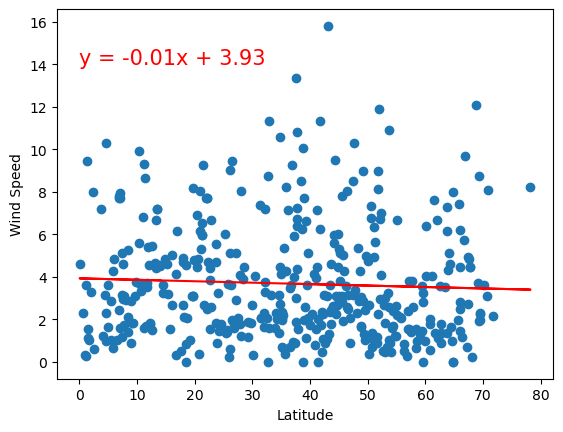

In [49]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.scatter(x_values,y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,14),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.23577166451118697


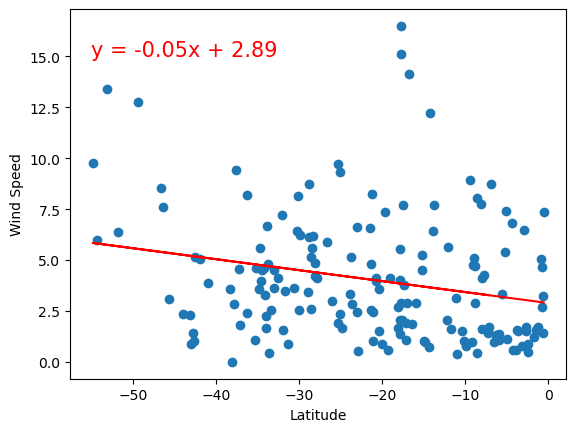

In [50]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.scatter(x_values,y_values)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** Again there is little correlation between the 2 hemispheres when it comes to wind speed.  This is to be expected as weather patters will be different at any given time in each hemisphere.